<a href="https://colab.research.google.com/github/LakshnaM/healthcare-data-eda/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
from google.colab import files

# Upload the file
uploaded = files.upload()

In [42]:
import pandas as pd

# Load the uploaded file
data = pd.read_csv('insurance.csv')
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [43]:
import os

# List all files in the current directory
print(os.listdir('.'))


['.config', 'insurance.csv', 'drive', 'sample_data']


In [44]:
# Get a summary of data types and null values
print(data.info())

# Statistical summary of numeric columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [45]:
# Check for missing values
print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [46]:
# Check for duplicate rows
print(data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()



1


In [47]:
data = data.drop_duplicates()

In [48]:
# Re-check for duplicates
print(data.duplicated().sum())

0


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")


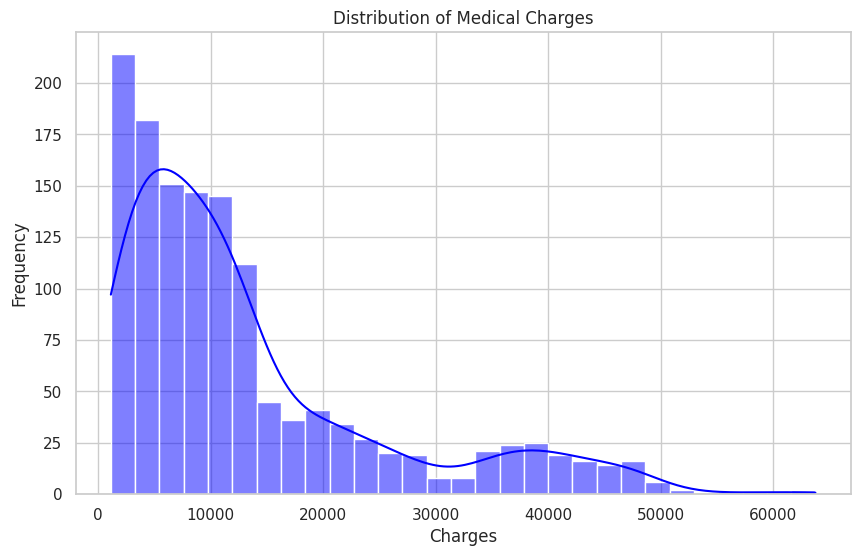

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


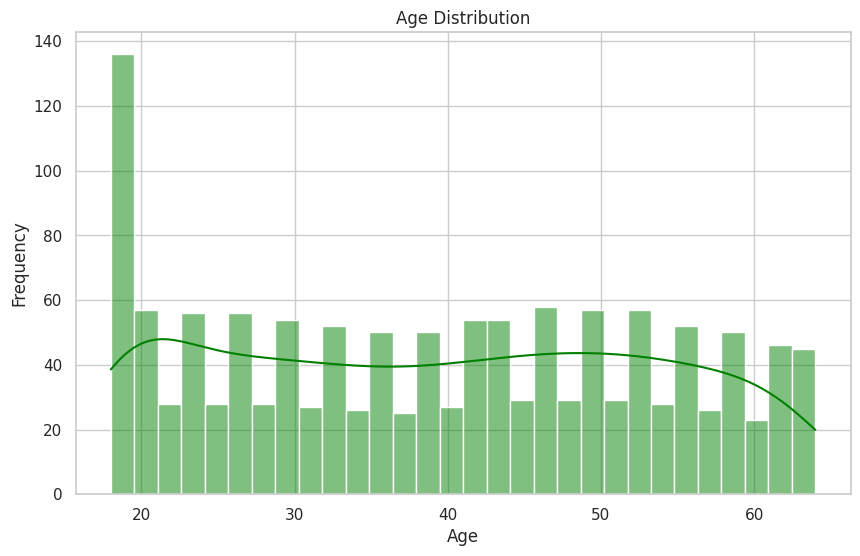

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Explore relationship Charges vs. Age

In [17]:
print(data.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [18]:
# Encode 'smoker' column
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Confirm changes
print(data.head())


   age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0       1  southwest  16884.92400
1   18    male  33.770         1       0  southeast   1725.55230
2   28    male  33.000         3       0  southeast   4449.46200
3   33    male  22.705         0       0  northwest  21984.47061
4   32    male  28.880         0       0  northwest   3866.85520


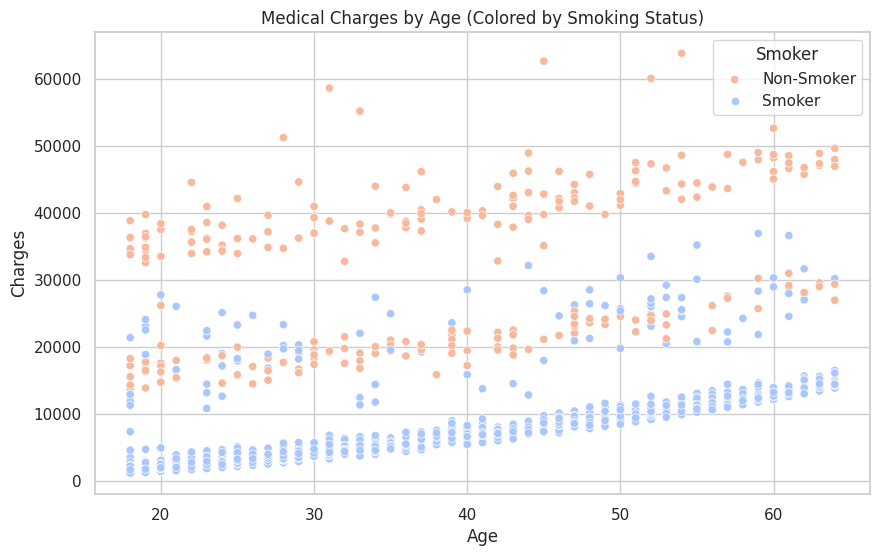

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, palette='coolwarm')
plt.title('Medical Charges by Age (Colored by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()


Group-Level Analysis
Analyze healthcare charges by various demographic or categorical variables.

 Charges by Gender

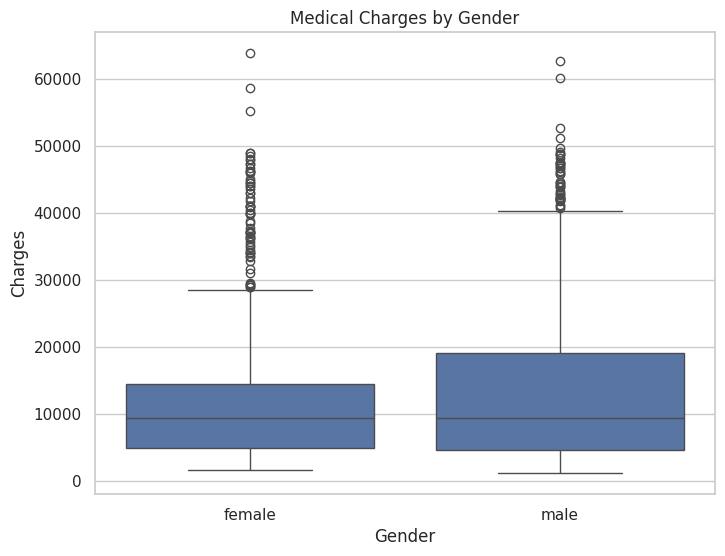

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Medical Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()


Charges by Region

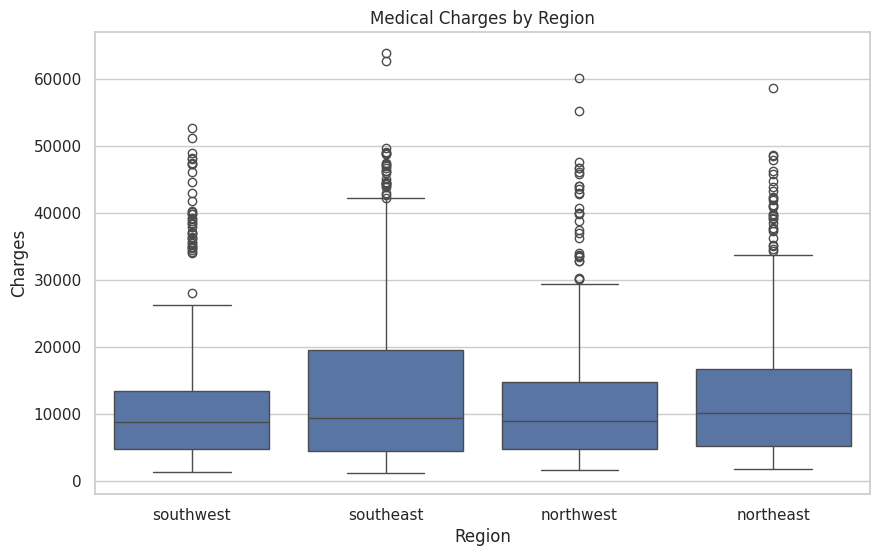

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


##BMI vs. Charges: Obesity Impact
Analyze the relationship between BMI and healthcare costs.

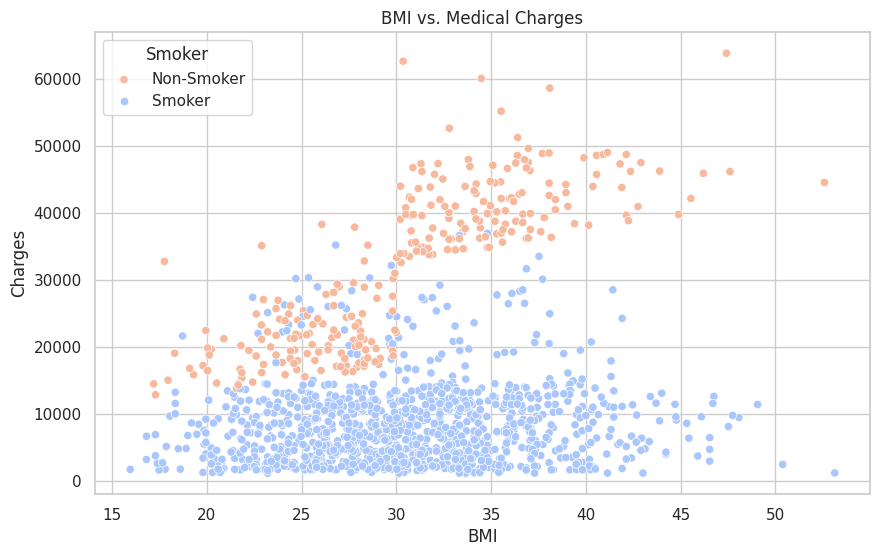

In [22]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, palette='coolwarm')
plt.title('BMI vs. Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

BMI vs. Charges: Obesity Impact

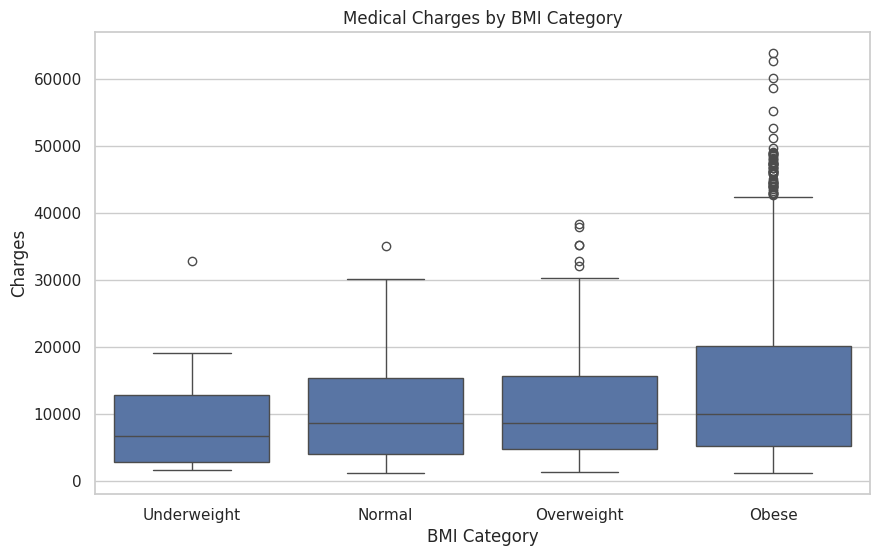

In [23]:
# Create BMI categories
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 100],
                              labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Charges by BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_category', y='charges', data=data)
plt.title('Medical Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()


##Correlation Heatmap

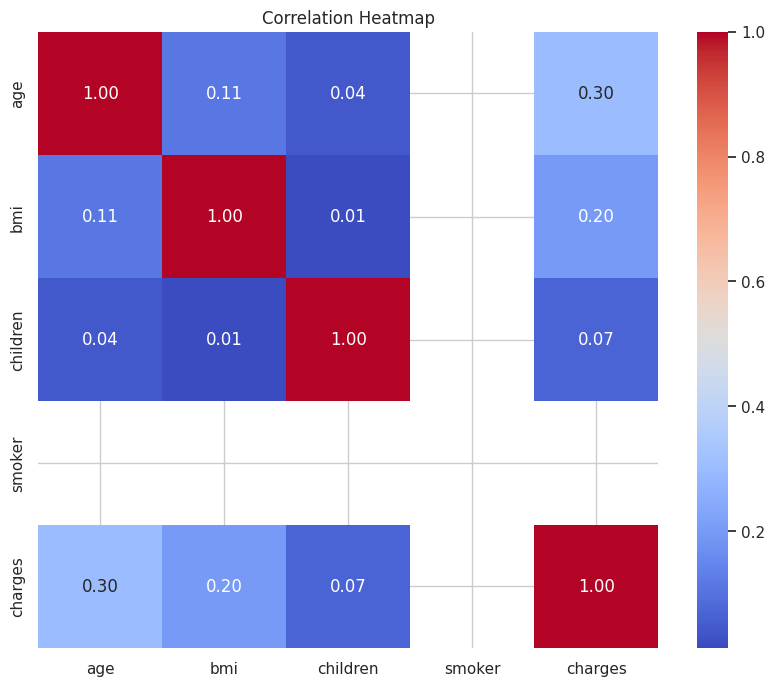

In [29]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##Predictive Modeling: Regression Analysis

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:

data = pd.read_csv('insurance.csv')

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Verify the encoded columns
print(data_encoded.columns)


Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [37]:
# Define features (X) and target (y)
X = data_encoded[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                  'region_northwest', 'region_southeast', 'region_southwest']]
y = data_encoded['charges']

# Confirm the shape of X and y
print(X.shape, y.shape)


(1338, 8) (1338,)


#Traning the model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 33596915.85
R-squared: 0.78


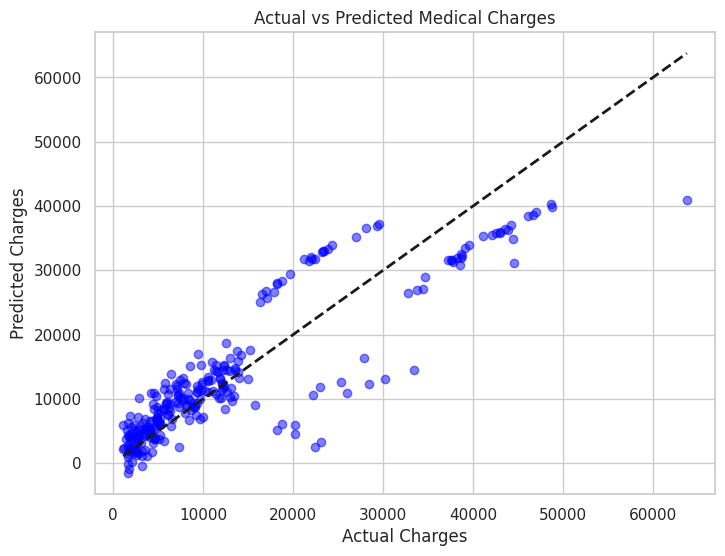

In [39]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()
